# Introduction

This notebook will calculate the observed fraction of times that it is providing power at a given time of day using the time stamp data.
This is different than using the messages data.

# Method

- resample time series data
- create a boolean on if sample reported

# Result

The timestamp method shows no data reported during the day.
This constrasts with the message example, implying that the messages underreport downtime.

# Follow up

- I'm not sure why I can't get the plots separate or with proper legends.
- Next step is to make a more careful accounting to get probabilities as the y-axis 

In [1]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

import pandas as pd
import numpy as np
import WP19_analysis as wpa

def wpa_create_uptime_boolean_timestamp(energy_data):
    acc_energy = energy_data['kWh export']
    rs_acc_energy = acc_energy.resample('1T').asfreq()
    boolean_uptime = (~rs_acc_energy.isnull()).astype(int)
    return boolean_uptime


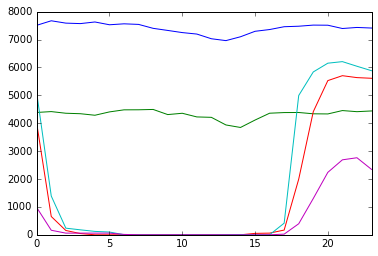

In [3]:
for rfd in wpa.raw_file_data:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    messages = wpa.load_message_file(vname + '-messages.csv')
    boolean_uptime = wpa_create_uptime_boolean_timestamp(energy_data)
    ax = boolean_uptime.groupby(boolean_uptime.index.hour).sum().plot()
    #ax.set_title(vname)